<a href="https://colab.research.google.com/github/badzlan/techfest-elims/blob/main/EDA_tipiel_IPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Efektivitas Penyaluran Dana Transfer ke Daerah (TKDD): Studi Perbandingan Pagu dan Realisasi TKDD di Provinsi-Provinsi Indonesia Tahun 2023

## 1. Data Preparation

### 1.1 Import library and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Pada tahap ini, dilakukan proses import beberapa library Python yang umum digunakan dalam analisis data, yaitu:

- `pandas` dan `numpy` untuk memproses dan menganalisis data dalam format tabel dan angka,

- `matplotlib.pyplot` dan `seaborn` untuk visualisasi data,

- `re` untuk pemrosesan teks.

In [2]:
# baca data dari github
url = "https://raw.githubusercontent.com/badzlan/techfest-elims/refs/heads/main/dataset.csv"
df = pd.read_csv(url)

# menampilkan 5 data pertama
df.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,"74,7","Rp 30.821.480.000.000,00","Rp 31.074.560.000.000,00",5.409.200,"5.744.760,78","14,45","227018,2",41.408.000,"4,23"
1,BALI,"78,01","Rp 11.152.110.000.000,00","Rp 11.064.980.000.000,00",4.374.300,"2.529.543,01","4,25","274358,18",62.294.000,"5,71"
2,BANTEN,"75,77","Rp 17.453.380.000.000,00","Rp 17.467.380.000.000,00",12.167.000,"1.435.635,74","6,17","814122,03",66.147.000,"4,81"
3,BENGKULU,"74,3","Rp 10.570.080.000.000,00","Rp 10.559.790.000.000,00",2.059.400,"5.127.605,13","14,04","96583,09",46.300.000,"4,28"
4,DI YOGYAKARTA,"81,09","Rp 10.355.870.000.000,00","Rp 10.241.290.000.000,00",3.712.600,"2.758.522,33","11,04","180696,04",48.360.000,"5,07"


Selanjutnya dataset diambil langsung dari repositori GitHub menggunakan `pd.read_csv()` dan dimuat ke dalam variabel `df`. Lalu menggunakan method `.head()` untuk  memastikan data berhasil dimuat dengan benar dan untuk mendapatkan gambaran awal struktur dataset menggunakan.

### 1.2 Cek Missing Values & Duplikasi

In [3]:
# cek missing values
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# cek duplikasi
print("\nJumlah baris duplikat:", df.duplicated().sum())

Jumlah missing value per kolom:
Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

Jumlah baris duplikat: 0


Pada tahap ini dilakukan pengecekan terhadap nilai kosong (missing values) dan duplikasi data.
Hasilnya menunjukkan bahwa terdapat beberapa kolom dengan missing values, yaitu:

- `IPM`: 4 provinsi tidak memiliki data,

- `Jumlah Penduduk`: 2 provinsi tidak memiliki data,

- `Persentase Penduduk Miskin`: 4 provinsi tidak memiliki data.

Sementara itu, tidak ditemukan baris duplikat dalam dataset, sehingga tidak diperlukan proses penghapusan data ganda.



### 1.3 Renaming Columns

In [4]:
# rename kolom-kolom
df.rename(columns={
    'Provinsi': 'provinsi',
    'IPM': 'ipm',
    'Pagu TKDD': 'pagu_tkdd',
    'Realisasi TKDD': 'realisasi_tkdd',
    'Jumlah Penduduk': 'jumlah_penduduk',
    'Anggaran APBN per kapita': 'apbn_per_kapita',
    'Persentase Penduduk Miskin': 'persentase_penduduk_miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku': 'pdrb_adhb',
    'Produk Domestik Regional Bruto per Kapita HB': 'pdrb_per_kapita_hb',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010': 'laju_pdrb_konstan_2010'
}, inplace=True)

df.columns

Index(['provinsi', 'ipm', 'pagu_tkdd', 'realisasi_tkdd', 'jumlah_penduduk',
       'apbn_per_kapita', 'persentase_penduduk_miskin', 'pdrb_adhb',
       'pdrb_per_kapita_hb', 'laju_pdrb_konstan_2010'],
      dtype='object')

Agar lebih mudah digunakan dalam proses analisis data dan visualisasi, seluruh nama kolom diubah menjadi format **huruf kecil** dan menggunakan **underscore** (`snake_case`).
Penyesuaian ini dilakukan agar sesuai dengan konvensi penulisan Python, sehingga mempermudah pemanggilan kolom dalam pemrosesan selanjutnya.

Contohnya:

- `Pagu TKDD` menjadi `pagu_tkdd`

- `Persentase Penduduk Miskin` menjadi `persentase_penduduk_miskin`

- `Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku` menjadi `pdrb_adhb`

### 1.4 Cek & Pastikan Tipe Data Numerik

In [5]:
# cek tipe data
print("\nTipe data setiap kolom:")
print(df.dtypes)

replacement_rules = {
    r'Rp ': '',
    r'\.': '',
    r',': '.'
}

clear_cols = ['ipm',
              'pagu_tkdd',
              'realisasi_tkdd',
              'jumlah_penduduk',
              'apbn_per_kapita',
              'persentase_penduduk_miskin',
              'pdrb_adhb',
              'pdrb_per_kapita_hb',
              'laju_pdrb_konstan_2010'
]

def apply_replacements(text, rules):
    # convert non-string values to string, handling NaN
    if not isinstance(text, str):
        return str(text)
    for pattern, replacement in rules.items():
        text = re.sub(pattern, replacement, text)
    return text

for col in clear_cols:
  df[col] = df[col].apply(lambda x: apply_replacements(x, replacement_rules))
  df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nTipe data setelah konversi:")
print(df.dtypes)


Tipe data setiap kolom:
provinsi                      object
ipm                           object
pagu_tkdd                     object
realisasi_tkdd                object
jumlah_penduduk               object
apbn_per_kapita               object
persentase_penduduk_miskin    object
pdrb_adhb                     object
pdrb_per_kapita_hb            object
laju_pdrb_konstan_2010        object
dtype: object

Tipe data setelah konversi:
provinsi                       object
ipm                           float64
pagu_tkdd                     float64
realisasi_tkdd                float64
jumlah_penduduk               float64
apbn_per_kapita               float64
persentase_penduduk_miskin    float64
pdrb_adhb                     float64
pdrb_per_kapita_hb              int64
laju_pdrb_konstan_2010        float64
dtype: object


Pada tahap ini dilakukan pengecekan dan penggantian tipe data untuk memastikan semua kolom numerik memiliki tipe data yang sesuai (`float64` atau `int64`).
Awalnya, sebagian besar kolom numerik masih terbaca sebagai object karena mengandung format angka khas Indonesia seperti:

- Simbol `"Rp "`,

- Titik `.` sebagai pemisah ribuan,

Koma `,` sebagai desimal.

Untuk itu, dilakukan pembersihan menggunakan library re untuk memproses regex (regular expression) dengan aturan penggantian berikut:

- Hapus `"Rp "` dan titik,

- Ganti koma `,` dengan titik `.` agar sesuai dengan format desimal Python.

Setelah dibersihkan, seluruh kolom dikonversi ke tipe numerik menggunakan `pd.to_numeric()`, sehingga proses analisis selanjutnya dapat dilakukan tanpa error.

Hasil akhir menunjukkan bahwa semua kolom numerik berhasil diubah ke tipe data numerik (`float64`/`int64`) dan siap dianalisis lebih lanjut.

### 1.5 Handle Missing Values

In [6]:
# list provinsi di sulawesi
sulawesi_provinces = [
    "SULAWESI UTARA", "SULAWESI TENGAH", "SULAWESI SELATAN",
    "SULAWESI TENGGARA", "SULAWESI BARAT", "GORONTALO"
]

# kolom yang akan diimputasi
target_columns = [
    'pagu_tkdd', 'realisasi_tkdd', 'apbn_per_kapita',
]

# imputasi hanya untuk provinsi sulawesi
for col in target_columns:
    mean_val = df[df['provinsi'].isin(sulawesi_provinces)][col].mean()
    df.loc[df['provinsi'] == 'SULAWESI UTARA', col] = mean_val

Dilakukan imputasi nilai yang hilang pada provinsi **Sulawesi Utara** untuk kolom `pagu_tkdd`, `realisasi_tkdd`, dan `apbn_per_kapita`.
Nilai yang digunakan adalah **rata-rata (mean)** dari provinsi-provinsi lain di Pulau Sulawesi. Pendekatan ini dipilih untuk mempertahankan relevansi geografis dan fiskal data.

In [7]:
# regional papua
papua_regional = ['PAPUA BARAT DAYA', 'PAPUA PEGUNUNGAN', 'PAPUA SELATAN', 'PAPUA TENGAH', 'PAPUA', 'PAPUA BARAT']

# handle ipm
papua_ipm = ['PAPUA BARAT DAYA', 'PAPUA PEGUNUNGAN', 'PAPUA SELATAN', 'PAPUA TENGAH']

for prov in papua_ipm :
  df.loc[df['provinsi'] == prov, 'ipm'] = df['ipm'].median()

# handle apbn, jumlah penduduk, persen penduduk miskin
papua_penduduk_apbn = ['PAPUA PEGUNUNGAN', 'PAPUA SELATAN']
col_papua_penduduk_apbn = ['jumlah_penduduk', 'apbn_per_kapita']

for prov in papua_penduduk_apbn :
  for col in col_papua_penduduk_apbn :
    df.loc[df['provinsi'] == prov, col] = df[df['provinsi'].isin(papua_regional)][col].mean()

# handle persentase penduduk miskin
papua_persentase_miskin = ['PAPUA BARAT DAYA', 'PAPUA PEGUNUNGAN', 'PAPUA SELATAN', 'PAPUA TENGAH']

for prov in papua_persentase_miskin :
  df.loc[df['provinsi'] == prov, 'persentase_penduduk_miskin'] = df[df['provinsi'].isin(papua_regional)]['persentase_penduduk_miskin'].mean()

- `ipm` untuk 4 provinsi pemekaran di Papua diisi dengan **median nasional**, karena indikator IPM relatif stabil dan distribusinya tidak terlalu ekstrem.

- `jumlah_penduduk` dan `apbn_per_kapita` untuk Papua Pegunungan dan Papua Selatan diisi dengan **mean dari seluruh provinsi di Papua** agar lebih kontekstual.

- `persentase_penduduk_miskin` pada 4 provinsi pemekaran juga diisi menggunakan **rata-rata (mean) dari provinsi-provinsi Papua lainnya** karena indikator ini sangat dipengaruhi kondisi wilayah setempat.

### 1.6 Tambahkan Kolom Rasio Realisasi TKDD

In [8]:
df['rasio_realisasi'] = (df['realisasi_tkdd'] / df['pagu_tkdd']) * 100


Kolom `rasio_realisasi` ditambahkan guna mengukur efektivitas penyerapan anggaran yang menunjukkan **persentase realisasi TKDD terhadap pagu TKDD**

Nilai ini dihitung dengan rumus:

$$ \text{Rasio Realisasi} = \left( \frac{\text{Realisasi TKDD}}{\text{Pagu TKDD}} \right) \times 100\% $$

Kolom ini akan digunakan pada analisis selanjutnya untuk klasifikasi dan perbandingan tingkat efektivitas penyaluran dana antar provinsi.

### 1.7 Klasifikasikan Rasio ke dalam 3 Kategori

In [9]:
def klasifikasi_realisasi(rasio):
    if rasio < 90:
        return '< 90'
    elif 90 <= rasio <= 100:
        return '90-100'
    elif rasio > 100:
        return '>100'
    else :
        return 'Unknown'

df['kategori_realisasi_%'] = df['rasio_realisasi'].apply(klasifikasi_realisasi)

Untuk mempermudah interpretasi efektivitas penyaluran anggaran Transfer ke Daerah (TKDD), dilakukan klasifikasi terhadap rasio realisasi anggaran ke dalam tiga kategori:

- `< 90` untuk provinsi dengan tingkat realisasi di bawah 90% (kurang efektif),

- `90-100` untuk provinsi dengan realisasi sesuai target (cukup efektif),

- `> 100` untuk provinsi dengan realisasi melebihi pagu (indikasi penambahan anggaran atau efisiensi belanja).

Kategori ini disimpan dalam kolom baru bernama `kategori_realisasi_%`, dan akan digunakan dalam analisis perbandingan serta visualisasi berikutnya.

### 1.8 Hasil Data Preparation

In [49]:
df

,provinsi,ipm,pagu_tkdd,realisasi_tkdd,jumlah_penduduk,apbn_per_kapita,persentase_penduduk_miskin,pdrb_adhb,pdrb_per_kapita_hb,laju_pdrb_konstan_2010,rasio_realisasi,kategori_realisasi_%
0,ACEH,74.70,3.082148e+13,3.107456e+13,5.409200e+06,5.744761e+06,14.45,227018.20,41408000,4.23,100.821116,>100
1,BALI,78.01,1.115211e+13,1.106498e+13,4.374300e+06,2.529543e+06,4.25,274358.18,62294000,5.71,99.218713,90-100
2,BANTEN,75.77,1.745338e+13,1.746738e+13,1.216700e+07,1.435636e+06,6.17,814122.03,66147000,4.81,100.080214,>100
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2.059400e+06,5.127605e+06,14.04,96583.09,46300000,4.28,99.902650,90-100
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3.712600e+06,2.758522e+06,11.04,180696.04,48360000,5.07,98.893574,90-100
5,DKI JAKARTA,83.55,2.469499e+13,2.508018e+13,1.064000e+07,2.357160e+06,4.44,3443026.23,322619000,4.96,101.559790,>100
6,GORONTALO,71.25,6.172420e+12,6.155410e+12,1.198400e+06,5.136357e+06,15.15,51366.74,42341000,4.50,99.724419,90-100
7,JAMBI,73.73,1.523207e+13,1.535267e+13,3.633200e+06,4.225661e+06,7.58,293780.01,79850000,4.67,100.791751,>100
8,JAWA BARAT,74.24,7.132176e+13,7.103169e+13,4.930680e+07,1.440606e+06,7.62,2625225.72,52652000,5.00,99.593294,90-100
9,JAWA TENGAH,73.39,6.712969e+13,6.677206e+13,3.718040e+08,1.795894e+05,10.77,1695621.57,45167000,4.97,99.467255,90-100



## 2. Analisis Perbandingan Pagu dan Realisasi TKDD
<a id='analisistkdd'></a>



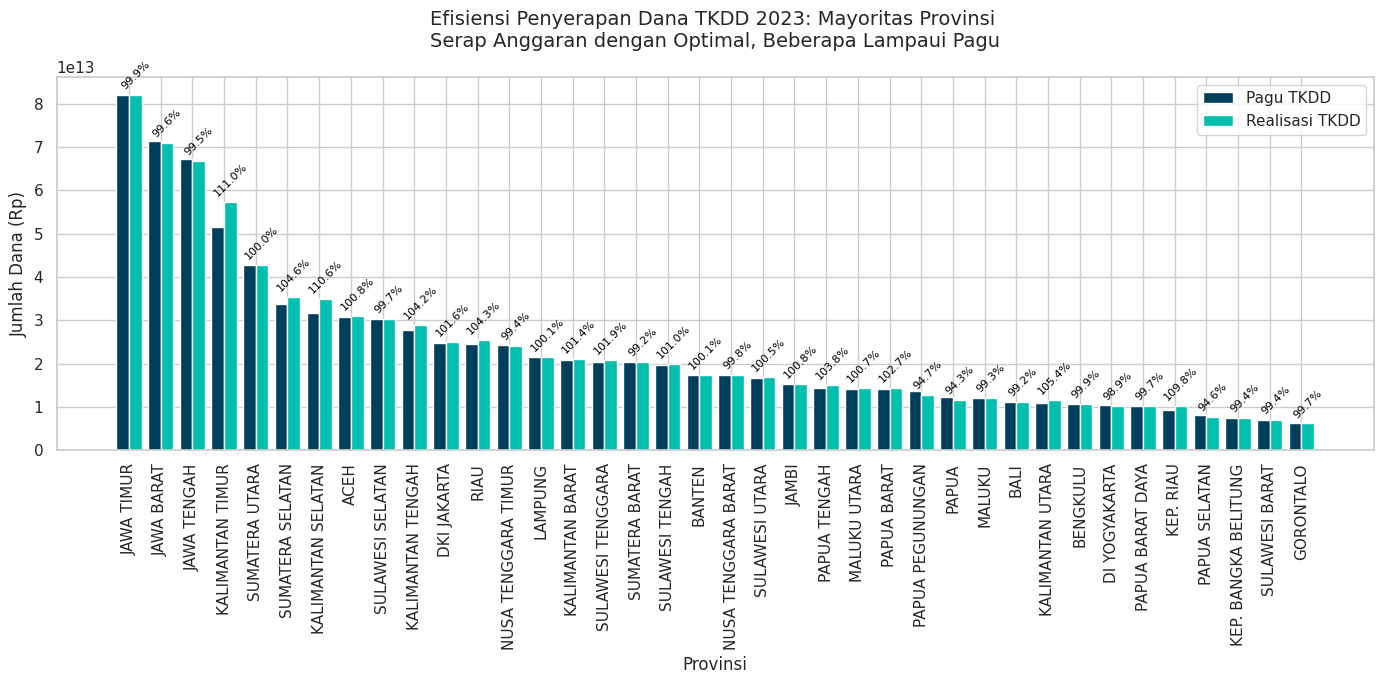

In [51]:
# set ukuran dan tema plot
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

# data diurutkan berdasarkan pagu_tkdd agar lebih terstruktur
df_sorted = df.sort_values('pagu_tkdd', ascending=False)

# bar plot
bar_width = 0.4
index = range(len(df_sorted))

plt.bar(index, df_sorted['pagu_tkdd'], bar_width, label='Pagu TKDD', color='#003f5c')
plt.bar([i + bar_width for i in index], df_sorted['realisasi_tkdd'], bar_width, label='Realisasi TKDD', color='#00bfae')

# tambahkan angka persentase realisasi di atas batang Realisasi TKDD
for i in index:
    # ambil nilai realisasi dan persentasenya
    realisasi_val = df_sorted['realisasi_tkdd'].iloc[i]
    persentase = df_sorted['rasio_realisasi'].iloc[i]
    # format teks persentase
    text = f'{persentase:.1f}%'

    # Posisi teks: di atas batang Realisasi TKDD
    # x-posisi: tengah-tengah batang realisasi (index + bar_width)
    # y-posisi: sedikit di atas nilai batang realisasi
    plt.text(i + bar_width, realisasi_val + (df_sorted['pagu_tkdd'].max() * 0.01), text,
             ha='center', va='bottom', fontsize=8, color='black', rotation=45) # Rotation biar ga tabrakan


# Tambahkan label provinsi di sumbu x
plt.xticks([i + bar_width/2 for i in index], df_sorted['provinsi'], rotation=90)

# Judul dan label
plt.title('Efisiensi Penyerapan Dana TKDD 2023: Mayoritas Provinsi \nSerap Anggaran dengan Optimal, Beberapa Lampaui Pagu\n', fontsize=14)
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Dana (Rp)')
plt.legend()
plt.tight_layout()

# Tampilkan plot
plt.show()


Grafik di atas menampilkan perbandingan antara **alokasi anggaran (pagu TKDD)** dan **penyerapan anggaran (realisasi TKDD)** di 38 provinsi di Indonesia sepanjang tahun 2023.

Secara umum, sebagian besar provinsi menunjukkan tingkat realisasi yang **mendekati atau sedikit di atas pagu**. Hal ini menunjukkan bahwa banyak daerah telah berupaya maksimal menyerap dana yang dialokasikan oleh pemerintah pusat.

Beberapa **provinsi besar seperti Jawa Timur, Jawa Barat, dan Jawa Tengah** mendominasi dari segi besaran pagu maupun realisasi, yang mencerminkan tingginya kebutuhan dan kapasitas fiskal mereka.

Menariknya, terdapat beberapa provinsi yang realisasinya melampaui 100% dari pagu awal, seperti **Kalimantan Timur**, **Kalimantan Selatan**, **Kepulauan Riau**, dan yang lainnya ditunjukkan oleh batang realisasi yang lebih tinggi dari pagunya. Fenomena ini bisa disebabkan oleh **penambahan anggaran berjalan**, seperti untuk program prioritas nasional atau belanja tidak terduga.

Di sisi lain, ada juga beberapa provinsi dengan selisih yang cukup besar antara pagu dan realisasi, mengindikasikan kemungkinan **kendala dalam penyerapan anggaran**, seperti kapasitas pelaksanaan program atau hambatan administratif.

## 3. Klasifikasi Persentase Realisasi TKDD

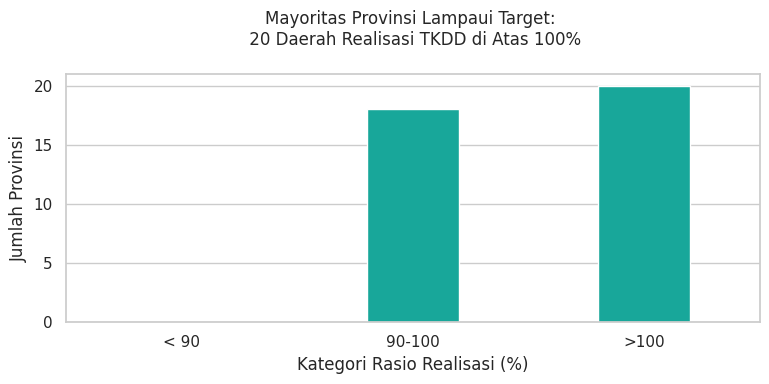

In [58]:
plt.figure(figsize=(8, 4))

sns.countplot(data=df, x=df['kategori_realisasi_%'], order=['< 90', '90-100', '>100'], color='#00bfae', width=0.4)

plt.title('Mayoritas Provinsi Lampaui Target: \n 20 Daerah Realisasi TKDD di Atas 100%\n')
plt.xlabel('Kategori Rasio Realisasi (%)')
plt.ylabel('Jumlah Provinsi')
plt.tight_layout()
plt.show()

Grafik ini mengelompokkan 38 provinsi berdasarkan rasio realisasi dana TKDD terhadap pagu anggaran tahun 2023. Kategorisasi dilakukan untuk menilai efektivitas dan efisiensi penyerapan anggaran. Terdapat tiga kategori rasio realisasi yang dianalisis:

- `< 90%`: Provinsi dengan penyerapan anggaran rendah,

- `90–100%`: Provinsi dengan penyerapan sesuai target,

- `> 100%`: Provinsi dengan realisasi melebihi pagu.

Dari grafik terlihat bahwa:

- **Tidak ada provinsi** yang berada pada kategori `< 90%`, menandakan bahwa seluruh daerah setidaknya mampu menyerap lebih dari 90% anggaran yang dialokasikan.

- Sebanyak **18 provinsi** berada pada kategori `90–100%`, mencerminkan penyerapan anggaran yang cukup baik dan sesuai rencana.

- Sebanyak **20 provinsi** berada pada kategori `> 100%`, yang mengindikasikan adanya penambahan anggaran selama tahun berjalan atau adanya fleksibilitas dalam penggunaan anggaran.

Tingginya jumlah provinsi dengan realisasi lebih dari 100% menunjukkan bahwa banyak daerah **berpotensi adaptif dalam pengelolaan dana**, namun juga perlu ditinjau lebih lanjut apakah lonjakan realisasi tersebut benar-benar berdampak terhadap kualitas pembangunan atau sekadar akibat revisi anggaran.

## 4. Analisis Faktor yang Mempengaruhi Realisasi TKDD

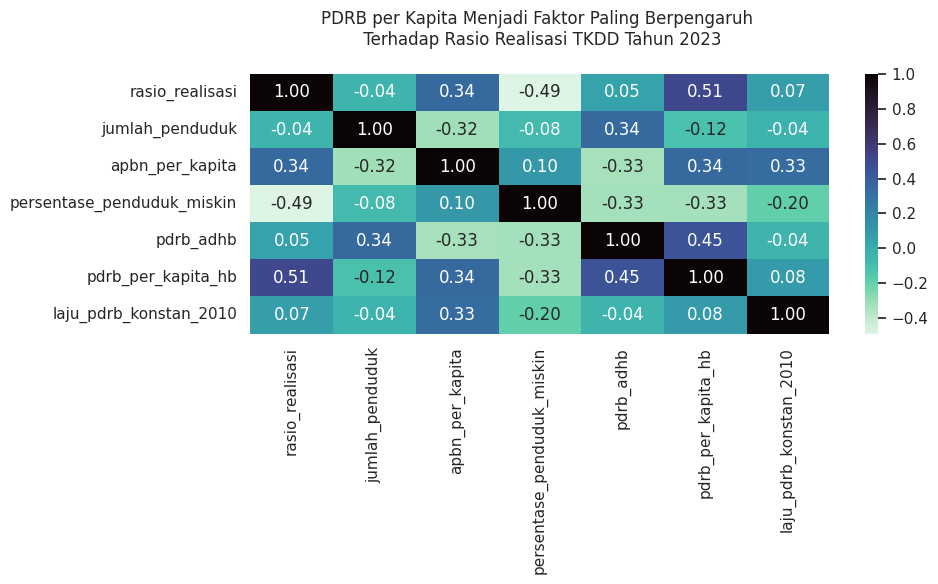

In [13]:
# pilih kolom numerik relevan untuk korelasi
cols_for_corr = [
    'rasio_realisasi',
    'jumlah_penduduk',
    'apbn_per_kapita',
    'persentase_penduduk_miskin',
    'pdrb_adhb',
    'pdrb_per_kapita_hb',
    'laju_pdrb_konstan_2010'
]

# hitung korelasi
corr_matrix = df[cols_for_corr].corr()

# visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako_r', fmt=".2f")
plt.title('PDRB per Kapita Menjadi Faktor Paling Berpengaruh \n Terhadap Rasio Realisasi TKDD Tahun 2023\n')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan tingkat korelasi antar variabel numerik, khususnya hubungan antara `rasio_realisasi` dan beberapa faktor seperti kemiskinan, PDRB, dan jumlah penduduk.

Hasil korelasi menunjukkan bahwa:

- PDRB per kapita memiliki korelasi positif sedang dengan rasio realisasi (`r = 0.51`). Artinya, provinsi dengan PDRB per kapita tinggi cenderung memiliki tingkat penyerapan anggaran TKDD yang lebih baik. Hal ini bisa dikaitkan dengan kapasitas fiskal dan tata kelola anggaran yang lebih kuat di daerah maju.

- Persentase penduduk miskin menunjukkan korelasi negatif moderat dengan rasio realisasi (`r = -0.49`). Provinsi dengan tingkat kemiskinan tinggi cenderung memiliki realisasi TKDD yang lebih rendah, kemungkinan karena keterbatasan dalam manajemen program dan infrastruktur.

- Anggaran APBN per kapita juga berkorelasi positif lemah dengan rasio realisasi (`r = 0.34`), mengindikasikan bahwa semakin besar anggaran per individu, semakin tinggi pula efektivitas penyaluran dana.

- Variabel lain seperti `jumlah_penduduk` dan `laju pertumbuhan PDRB` memiliki korelasi sangat lemah terhadap realisasi TKDD, yang menandakan bahwa faktor-faktor tersebut tidak terlalu berpengaruh secara langsung terhadap efektivitas penyerapan anggaran.

Daerah dengan **kesejahteraan ekonomi lebih tinggi** (tercermin dari PDRB per kapita) cenderung lebih efisien dalam menyerap anggaran TKDD. Tingginya angka kemiskinan bisa menjadi penghambat dalam realisasi dana, bukan hanya karena rendahnya kapasitas fiskal, tapi juga potensi hambatan administratif dan infrastruktur.

## 5. Analisis Hubungan Realisasi TKDD dan IPM

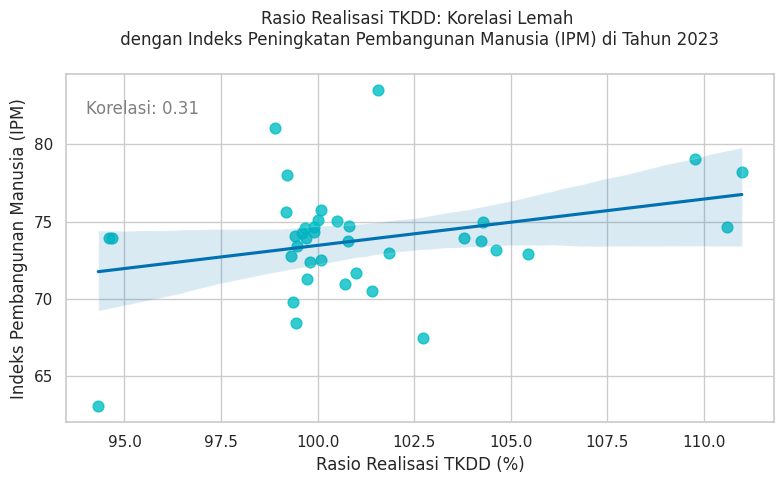

Korelasi antara rasio realisasi dan IPM: 0.31


In [14]:
# scatter plot antara rasio realisasi dan IPM
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='rasio_realisasi', y='ipm',
            scatter_kws={'s': 60, 'color': '#00BFC4'},
            line_kws={'color': '#0072B2'})

corr = df['rasio_realisasi'].corr(df['ipm'])
plt.text(94, 82, f'Korelasi: {corr:.2f}', fontsize=12, color='gray')
plt.title('Rasio Realisasi TKDD: Korelasi Lemah \n dengan Indeks Peningkatan Pembangunan Manusia (IPM) di Tahun 2023 \n')
plt.xlabel('Rasio Realisasi TKDD (%)')
plt.ylabel('Indeks Pembangunan Manusia (IPM)')
plt.grid(True)
plt.tight_layout()
plt.show()

# hitung korelasi
print(f"Korelasi antara rasio realisasi dan IPM: {corr:.2f}")

Grafik scatter plot di atas menggambarkan hubungan antara **rasio realisasi dana TKDD (%)** dan Indeks Pembangunan Manusia (IPM) di 38 provinsi di Indonesia pada tahun 2023.

Dari grafik, terlihat bahwa titik-titik data tersebar cukup merata di sepanjang rentang rasio realisasi antara 94% hingga 110%. Sementara itu, nilai IPM berkisar antara 64 hingga 84.

Meskipun garis regresi menunjukkan **tren positif**, yang mengindikasikan bahwa secara umum semakin tinggi realisasi TKDD maka IPM juga cenderung meningkat, **korelasi ini tetap sangat lemah** dan tidak menunjukkan hubungan yang kuat. Hal ini dapat terlihat dari sebaran titik yang cukup lebar di sekitar garis tren dan bayangan area biru yang merepresentasikan *confidence interval* yang cukup besar.

- Beberapa provinsi dengan realisasi tinggi (di atas 105%) tetap memiliki **IPM yang rendah**, mengindikasikan bahwa **besarnya dana yang disalurkan tidak otomatis menghasilkan output pembangunan yang optimal**.

- Hal ini menunjukkan perlunya fokus yang lebih besar terhadap **efektivitas dan alokasi penggunaan anggaran**, bukan hanya penyerapan dana.

Dengan kata lain, **tingginya persentase realisasi anggaran TKDD belum tentu berdampak langsung pada peningkatan kualitas hidup masyarakat**, yang tercermin melalui IPM.

## 6. Insight & Rekomendasi Kebijakan

 **Insight Berdasarkan Temuan Data:**

1. Sebagian besar provinsi menunjukkan rasio realisasi TKDD yang baik

  > Kategori >100% mendominasi, dengan sisa daerah yang lain berada pada range 90%-100% penyerapan anggaran. Ini mencerminkan komitmen pemerintah daerah dalam menggunakan anggaran pusat.

2. Namun, realisasi tinggi tidak selalu diiringi peningkatan IPM

  > Hubungan antara rasio realisasi dan IPM hanya menunjukkan korelasi positif sangat lemah. Hal ini mengindikasikan bahwa efektivitas penggunaan dana jauh lebih penting dibanding jumlahnya.

3. Provinsi dengan PDRB per kapita tinggi cenderung menyerap TKDD lebih baik

  > Ini mencerminkan bahwa daerah dengan kapasitas ekonomi yang kuat cenderung memiliki tata kelola anggaran yang lebih baik.

4. Tingkat kemiskinan berkorelasi negatif dengan efektivitas penyerapan TKDD

  > Artinya, daerah yang masih terjebak dalam kemiskinan cenderung kesulitan menyerap dan mengelola dana dengan optimal.

**Rekomendasi Kebijakan:**

1. Fokus pada Kualitas Belanja, bukan hanya Kuantitas

  - Pemerintah pusat dan daerah perlu meninjau kembali apakah alokasi dana TKDD diarahkan pada program-program yang berdampak langsung terhadap pembangunan manusia seperti pendidikan, kesehatan, dan kesejahteraan sosial.

2. Pendampingan Teknis bagi Provinsi dengan Realisasi < 100%

  - Perlu ada intervensi berupa penguatan kapasitas perencanaan dan penganggaran, terutama di daerah-daerah dengan realisasi < 100% namun kebutuhan pembangunan masih tinggi.

3. Perluasan indikator kinerja transfer daerah

  - Selain IPM, perlu digunakan indikator lain seperti angka partisipasi sekolah, akses air bersih, atau kepuasan layanan publik, untuk mengukur efektivitas penggunaan dana TKDD.

4. Pertimbangkan model insentif berbasis kinerja

  - Pemerintah pusat dapat menerapkan skema insentif bagi daerah yang tidak hanya berhasil menyerap anggaran tinggi, tetapi juga berhasil meningkatkan indikator pembangunan manusia secara signifikan.

## 7. Menjawab Rumusan Masalah

### 7.1 Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?

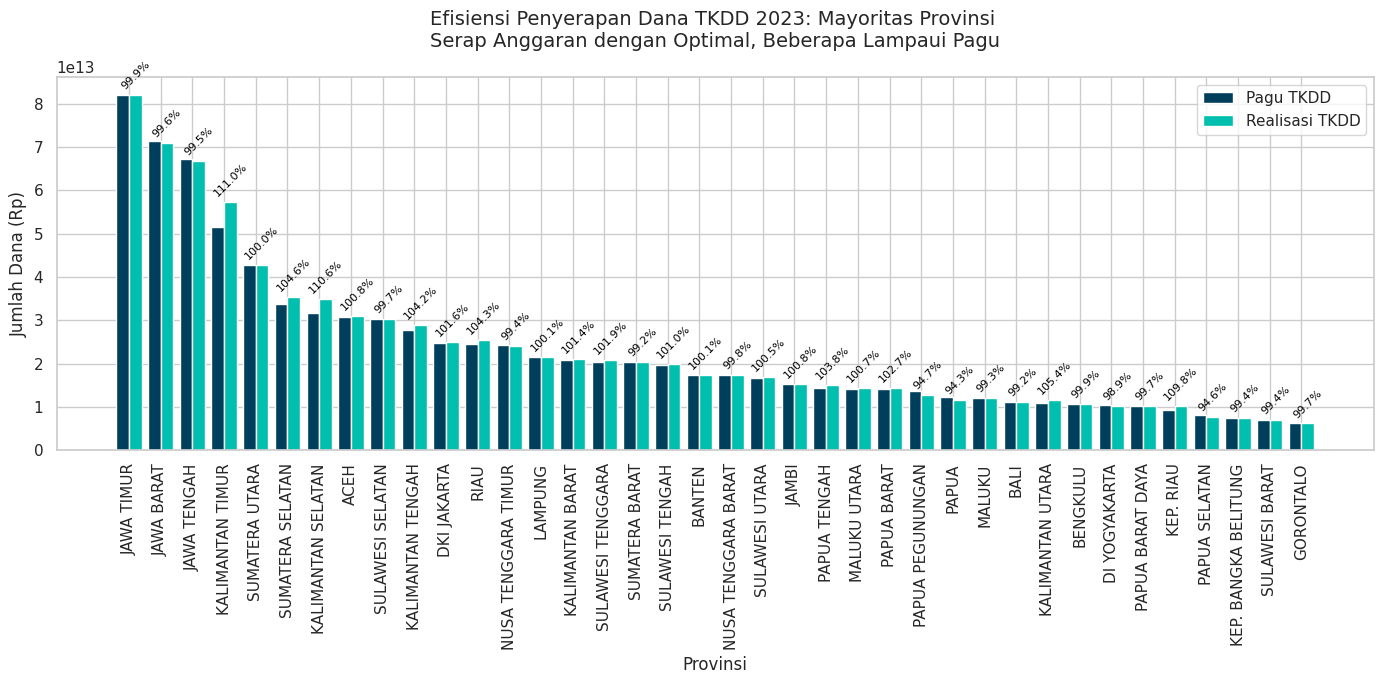

Visualisasi di atas menyajikan perbandingan antara **alokasi anggaran (Pagu TKDD)** dan **realisasi anggaran (Realisasi TKDD)** untuk 38 provinsi di Indonesia sepanjang tahun 2023. Melalui grafik ini, kita dapat melihat sejauh mana tiap daerah mampu memanfaatkan anggaran yang diberikan oleh pemerintah pusat.

**Mayoritas Provinsi Menyerap Anggaran dengan Baik**

  - Sebagian besar provinsi menunjukkan **tingkat realisasi mendekati atau bahkan melampaui 100%**.
  - Hal ini mencerminkan bahwa secara umum, pemerintah daerah cukup efektif dalam menyerap anggaran dan menjalankan program-program pembangunan yang telah direncanakan.

  Contoh provinsi yang berhasil menyerap anggaran secara optimal:
  - **Jawa Timur (99.9%)**
  - **Jawa Barat (99.6%)**
  - **Jawa Tengah (99.5%)**

Ketiga provinsi tersebut tidak hanya menjadi 3 dari 38 alokasi anggaran yang besar, tetapi juga mampu memanfaatkannya hampir secara penuh, menunjukkan kapasitas fiskal dan tata kelola yang relatif baik.

**Beberapa Provinsi Melampaui 100% dari Pagu**

Ada sejumlah provinsi yang **realisasi TKDD-nya melebihi 100%**, yang berarti mereka memperoleh dana tambahan di luar pagu awal karena kebutuhan mendesak atau penyesuaian anggaran selama tahun berjalan.

Contohnya:
- **Kalimantan Timur (111%)**
- **Kalimantan Selatan (110.6%)**
- **Kepulauan Riau (109.8%)**

Fenomena ini bisa terjadi karena program prioritas nasional, proyek strategis, atau penyesuaian belanja tak terduga.

**Ketimpangan Realisasi Masih Terjadi**

Di sisi lain, masih ada beberapa provinsi dengan **rasio realisasi yang relatif lebih rendah** dari daerah lain, meskipun sebagian besar tetap di atas 90%. Angka sudah cukup baik, tetapi tetap menandakan bahwa masih ada ruang untuk peningkatan efektivitas dalam penyerapan anggaran, mungkin karena hambatan administrasi, kapasitas SDM, atau tantangan geografis.

**Kesimpulan**

Secara keseluruhan, tingkat penyerapan TKDD tahun 2023 menunjukkan tren yang **cukup positif**:

- Sebagian besar provinsi berhasil menyerap dana dengan baik.
- Beberapa bahkan menunjukkan fleksibilitas dan adaptasi yang tinggi terhadap dinamika anggaran.
- Namun, realisasi anggaran yang tinggi belum tentu berarti pembangunan yang optimal — masih diperlukan evaluasi pada kualitas belanja, bukan hanya kuantitas.

### 7.2 Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?


In [15]:
# Pilih hanya kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'rasio_realisasi' and 'ipm' dari format koma, karena udah jadi koma
cols_to_format = [col for col in numeric_cols if col not in ['rasio_realisasi', 'ipm']]

# apply formatting to the columns
df_f = df.copy()
for col in cols_to_format:
    df_f[col] = df_f[col].apply(lambda x: format(x, ',.0f'))

# Format 'rasio_realisasi' dan 'ipm' ke desimal dengan 2 angka di belakang
df_f['rasio_realisasi'] = df_f['rasio_realisasi'].apply(lambda x: format(x, ',.2f') if pd.notnull(x) else x)
df_f['ipm'] = df_f['ipm'].apply(lambda x: format(x, ',.2f') if pd.notnull(x) else x)


# Akses ID dengan tingkat rasio realisasi tertinggi dan terendah
provinsi_tertinggi = df_f.loc[df['rasio_realisasi'].astype(float).idxmax()]
provinsi_terendah = df_f.loc[df['rasio_realisasi'].astype(float).idxmin()]

# Tampilkan nama provinsi, rasio realisasi, pagu tkdd dan realisasi tkdd provinsi tertinggi
print("Provinsi dengan Realisasi TKDD Tertinggi:")
print(provinsi_tertinggi[['provinsi', 'rasio_realisasi','pagu_tkdd','realisasi_tkdd']])

# Tampilkan nama provinsi, rasio realisasi, pagu tkdd dan realisasi tkdd provinsi terendah
print("\nProvinsi dengan Realisasi TKDD Terendah:")
print(provinsi_terendah[['provinsi', 'rasio_realisasi','pagu_tkdd','realisasi_tkdd']])

Provinsi dengan Realisasi TKDD Tertinggi:
provinsi             KALIMANTAN TIMUR
rasio_realisasi                110.98
pagu_tkdd          51,643,470,000,000
realisasi_tkdd     57,314,680,000,000
Name: 14, dtype: object

Provinsi dengan Realisasi TKDD Terendah:
provinsi                        PAPUA
rasio_realisasi                 94.32
pagu_tkdd          12,211,710,000,000
realisasi_tkdd     11,518,350,000,000
Name: 23, dtype: object


Berdasarkan data:

Kalimantan Timur muncul sebagai provinsi dengan realisasi tertinggi, mencapai **110.9%** dari total pagu anggarannya.
Dengan alokasi dana sebesar **Rp 51,64 triliun**, provinsi ini bahkan berhasil merealisasikan dana hingga **Rp 57,31 triliun**, melampaui target awal.

Sebaliknya, Papua menjadi provinsi dengan tingkat realisasi paling rendah, hanya **94.3%** dari total pagu sebesar **Rp 12,21 triliun**, dengan realisasi **Rp 11,52 triliun**. Meski angka ini tetap di atas 90%, namun jika dibandingkan dengan provinsi lain, Papua terlihat belum mampu menyerap anggaran secara penuh.

Kontras antara Kalimantan Timur dan Papua bukan sekadar soal besar-kecilnya dana, tapi mencerminkan ketimpangan dalam kapasitas fiskal dan kesiapan eksekusi anggaran antar wilayah. Di satu sisi, ada provinsi yang bahkan mampu menyerap melebihi target, sementara di sisi lain, ada wilayah yang masih tertinggal dalam pemanfaatan dana yang tersedia.
Cerita ini membuka ruang bagi pertanyaan lanjutan: "Apakah provinsi dengan realisasi tinggi juga menghasilkan pembangunan yang berkualitas? Atau justru sebaliknya, daerah dengan tantangan geografis perlu pendekatan kebijakan yang lebih kontekstual?"

### 7.3 Apa kemungkinan faktor-faktor yang mempengaruhi tinggi/rendahnya realisasi TKDD?

Tinggi atau rendahnya realisasi TKDD di setiap provinsi dipengaruhi oleh berbagai faktor ekonomi dan sosial. Provinsi dengan tingkat kesejahteraan ekonomi yang tinggi, seperti yang tercermin dari PDRB per kapita yang besar, umumnya memiliki penyerapan anggaran yang lebih baik. Hal ini menunjukkan adanya kapasitas fiskal yang kuat dan tata kelola keuangan daerah yang lebih efektif.

Sebaliknya, provinsi dengan tingkat kemiskinan yang tinggi cenderung mengalami kesulitan dalam merealisasikan anggaran TKDD. Faktor ini dapat berkaitan dengan terbatasnya kemampuan manajerial, minimnya infrastruktur pendukung, serta hambatan administratif dalam pelaksanaan program.

Di samping itu, besarnya anggaran yang dialokasikan per individu juga berpengaruh terhadap efektivitas penyaluran dana, meskipun tidak selalu menjadi faktor utama. Adapun variabel lain seperti jumlah penduduk dan laju pertumbuhan ekonomi daerah tidak memiliki pengaruh yang signifikan terhadap tingkat realisasi TKDD.

Dengan demikian, dapat disimpulkan bahwa efektivitas penyerapan TKDD dipengaruhi oleh kesejahteraan ekonomi daerah, tingkat kemiskinan, kapasitas tata kelola anggaran, dan kesiapan infrastruktur administratif di masing-masing provinsi.

### 7.4 Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?

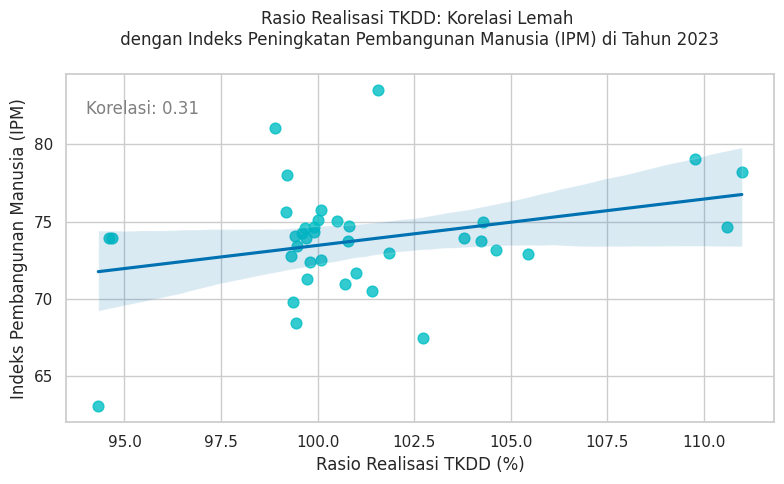

Berdasarkan data yang ditampilkan dalam grafik, hubungan antara realisasi TKDD dan Indeks Pembangunan Manusia (IPM) pada 38 provinsi di Indonesia tahun 2023 menunjukkan kecenderungan yang sangat lemah. Meskipun garis regresi menunjukkan tren positif, di mana semakin tinggi tingkat realisasi TKDD maka IPM juga cenderung meningkat, sebaran data yang cukup luas di sekitar garis tren menunjukkan bahwa hubungan tersebut tidak kuat.

Ditemukan bahwa beberapa provinsi dengan realisasi anggaran yang tinggi tetap memiliki nilai IPM yang rendah. Hal ini mengindikasikan bahwa besarnya dana yang tersalurkan tidak selalu berbanding lurus dengan peningkatan kualitas hidup masyarakat. Dengan demikian, efektivitas pemanfaatan dana menjadi aspek yang lebih penting daripada sekadar tingginya angka penyerapan anggaran.

Kesimpulannya, tingkat realisasi TKDD tidak memiliki hubungan yang kuat terhadap peningkatan IPM, sehingga keberhasilan pembangunan manusia tidak hanya ditentukan oleh besarnya dana yang disalurkan, tetapi juga oleh seberapa tepat dan efektif dana tersebut dialokasikan dan digunakan.

### 7.5 Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?

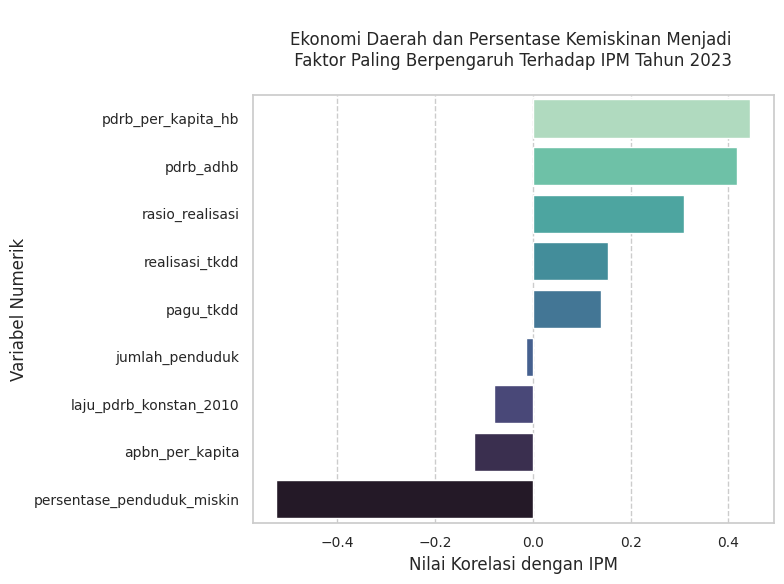

Indeks Pembangunan Manusia (IPM) merupakan indikator penting yang merepresentasikan kualitas hidup masyarakat suatu wilayah, dilihat dari aspek pendidikan, kesehatan, dan pendapatan. Berdasarkan analisis korelasi terhadap data 38 provinsi di Indonesia pada tahun 2023, ditemukan beberapa temuan penting sebagai berikut:

**1. Ekonomi Daerah Berpengaruh Signifikan terhadap IPM**

  - **PDRB per kapita (`r = 0.44`)** dan **PDRB ADHB (`r = 0.42`)** menunjukkan korelasi yang cukup kuat dan positif terhadap IPM.
  - Artinya, semakin besar output ekonomi suatu provinsi dan semakin tinggi pendapatan per kapitanya, maka semakin tinggi pula kualitas hidup penduduk di provinsi tersebut.
  - Hal ini mencerminkan bahwa provinsi dengan daya beli yang kuat cenderung memiliki akses lebih baik terhadap pendidikan, kesehatan, dan layanan dasar lainnya.

**2. Kemiskinan Menjadi Faktor Penghambat Utama**

  - **Persentase penduduk miskin (`r = -0.52`) memiliki korelasi negatif yang paling kuat dengan IPM.**
  - Provinsi dengan tingkat kemiskinan yang tinggi cenderung memiliki kualitas hidup yang lebih rendah, terlepas dari besarnya anggaran yang diterima.
  - Ini menunjukkan bahwa pengentasan kemiskinan tetap menjadi fokus utama dalam upaya peningkatan IPM.

**3. Besarnya Dana Tidak Menjamin Kualitas Hidup Meningkat**

- Beberapa variabel fiskal seperti:
  - **Pagu TKDD (r = 0.14)**
  - **Realisasi TKDD (r = 0.15)**
  - **APBN per kapita (r = -0.12)**
  memiliki korelasi sangat rendah terhadap IPM.
- Temuan ini menunjukkan bahwa besarnya alokasi dana dari pemerintah pusat **tidak otomatis menghasilkan dampak signifikan terhadap pembangunan manusia** jika tidak diimbangi dengan alokasi yang tepat sasaran dan pengelolaan yang efisien.

**4. Faktor Demografi dan Pertumbuhan Ekonomi Tidak Terlalu Berpengaruh**

- Korelasi **jumlah penduduk (r = -0.01)** dan **laju pertumbuhan PDRB (r = -0.08)** terhadap IPM sangat lemah.
- Ini mengindikasikan bahwa besar populasi atau pertumbuhan ekonomi tahunan **bukan penentu utama** dalam peningkatan kualitas hidup masyarakat jika tidak dibarengi dengan pembangunan inklusif.

**Kesimpulan**

Secara keseluruhan, hasil ini menggarisbawahi bahwa:

- **Kekuatan ekonomi daerah** dan **penurunan kemiskinan** adalah dua pendorong utama dalam peningkatan IPM.
- **Besar anggaran pemerintah tidak menjamin dampak langsung**, sehingga perlu dilakukan reformasi alokasi anggaran berbasis kebutuhan nyata masyarakat.
- Evaluasi pembangunan manusia tidak hanya melihat serapan anggaran, tetapi **perlu mempertimbangkan bagaimana dana tersebut berdampak langsung terhadap kesejahteraan masyarakat.**
